# Animal Aging and Longevity

AnAge is a database of animal ageing and longevity. It contains detailed information about ~4200 specimens that can be used not only for a longevity study but for other analyses as well. It can be downloaded [here](http://genomics.senescence.info/species/index.html) (the zipped tab-delimited dataset).

The database is in a `.txt` file, where the first line contains the column names and each row corresponds to one species. Values are separated by tabs.

Column names and descriptions are as follows:

| #  | Name                                  | Description                                            | Type   |
| -: | :------------------------------------ | :----------------------------------------------------- | :----- |
| 0  | HAGRID                                | Human Ageing Genomic Resources ID                      | int    |
| 1  | Kingdom                               | self-explanatory                                       | string |
| 2  | Phylum                                | self-explanatory                                       | string |
| 3  | Class                                 | self-explanatory                                       | string |
| 4  | Order                                 | self-explanatory                                       | string |
| 5  | Family                                | self-explanatory                                       | string |
| 6  | Genus                                 | self-explanatory                                       | string |
| 7  | Species                               | self-explanatory                                       | string |
| 8  | Common name                           | self-explanatory                                       | string |
| 9  | Female maturity (days)                | self-explanatory                                       | int    |
| 10 | Male maturity (days)                  | self-explanatory                                       | int    |
| 11 | Gestation/Incubation (days)           | self-explanatory                                       | int    |
| 12 | Weaning (days)                        | self-explanatory                                       | int    |
| 13 | Litter/Clutch size                    | self-explanatory                                       | float  |
| 14 | Litters/Clutches per year             | self-explanatory                                       | float  |
| 15 | Inter-litter/Interbirth interval      | self-explanatory                                       | int    |
| 16 | Birth weight (g)                      | self-explanatory                                       | float  |
| 17 | Weaning weight (g)                    | self-explanatory                                       | float  |
| 18 | Adult weight (g)                      | self-explanatory                                       | float  |
| 19 | Growth rate (1/days)                  | self-explanatory                                       | float  |
| 20 | Maximum longevity (yrs)               | self-explanatory                                       | float  |
| 21 | Source                                | Source of the data                                     | string |
| 22 | Specimen origin                       | Where the specimen was studies ('wild', 'captivity' or 'unknown') | string |
| 23 | Sample size                           | 'tiny' (fewer than 10 specimens), 'small' (10-100), 'medium' (100-1000), 'large' (over 1000) and 'huge' | string |
| 24 | Data quality                          | Reliability of the date ('low', 'questionable', 'acceptable' or 'high') | string |
| 25 | IMR (per yr)                          | Infant mortality rate                                  | float |
| 26 | MRDT (yrs)                            | Mortality rate doubling time (the time required for the mortality rate to double) | float |
| 27 | Metabolic rate (W)                    | self-explanatory                                       | float |
| 28 | Body mass (g)                         | self-explanatory                                       | float |
| 29 | Temperature (K)                       | self-explanatory                                       | float |
| 30 | References                            | self-explanatory                                       | string |

The data is stored in a list of lists. Each inner list contains the values for one specimen, thus the number on the table above corresponds to the index in the list (e.g. the element at position 18 is the adult weight).

_Note: Since we do not know what we are looking for yet, we will store all data._

In [77]:
# AnAge database: http://genomics.senescence.info/species/index.html

file = open("anage_data.txt")
ds_complete = []
int_pos = [0, 10, 11, 12, 15]
float_pos = [9, 13, 14, 16, 17, 18, 19, 20, 25, 26, 27, 28, 29]
eliminated = 0

first_line = True
for line in file:
    vals = line.strip().split('\t')
    if first_line:
        first_line = False
    else:
        if len(vals) == 31:
            for i in int_pos:
                if vals[i] == '':
                    vals[i] = None
                else:
                    vals[i] = int(vals[i])
            for i in float_pos:
                if vals[i] == '':
                    vals[i] = None
                else:
                    vals[i] = float(vals[i])
            ds_complete.append(vals)
        else:
            # Only 9 are eliminated
            eliminated += 1  
            
def select(ds, col, values):
    new_ds = []
    for animal in ds:
        if animal[col] in values:
            new_ds.append(animal)
    return new_ds

def selectNot(ds, col, values):
    new_ds = []
    for animal in ds:
        if animal[col] not in values:
            new_ds.append(animal)
    return new_ds

def selectRange(ds, col, minv, maxv):
    new_ds = []
    for animal in ds:
        if animal[col] != None and minv <= animal[col] <= maxv:
            new_ds.append(animal)
    return new_ds

## Finding all possible values for a column

We want to find out what are the possible values for kingdom, phylum, class, order, family and genus are represented in this dataset.

In [96]:
def dsInfo(ds):
    kingdom = set()
    phylum = set()
    clss = set()
    order = set()
    family = set()
    genus = set()
    species = set()

    for animal in ds:
        kingdom.add(animal[1])
        phylum.add(animal[2])
        clss.add(animal[3])
        order.add(animal[4])
        family.add(animal[5])
        genus.add(animal[6])
        species.add(animal[7])

    print("Kingdoms:", kingdom)
    print("Phylum:", phylum)
    print("Class:", clss)
    print("Number of classes:", len(clss))
    print("Number of orders:", len(order))
    print("Number of families", len(family))
    print("Number of geni:", len(genus))
    print("Number of species:", len(species))
    
def dsClassDistribution(ds):
    clss = dict()

    for animal in ds:
        if animal[3] in clss:
            clss[animal[3]] += 1
        else:
            clss[animal[3]] = 1
       
    x = []
    labels = []
    for c in clss:
        labels.append(c)
        x.append(clss[c])
       
    plt.figure(figsize=(7,7))
    plt.pie(x, labels=labels, autopct="%.1f%%")
    plt.show()
 
dsInfo(ds_complete)
#dsClassDistribution(ds_complete)

Kingdoms: {'Fungi', 'Animalia', 'Plantae'}
Phylum: {'Cnidaria', 'Ascomycota', 'Arthropoda', 'Porifera', 'Echinodermata', 'Pinophyta', 'Mollusca', 'Chordata', 'Nematoda'}
Class: {'Hydrozoa', 'Chromadorea', 'Malacostraca', 'Demospongiae', 'Pinopsida', 'Insecta', 'Cephalaspidomorphi', 'Mammalia', 'Holostei', 'Echinoidea', 'Saccharomycetes', 'Amphibia', 'Teleostei', 'Sordariomycetes', 'Aves', 'Dipnoi', 'Schizosaccharomycetes', 'Branchiopoda', 'Reptilia', 'Chondrichthyes', 'Cladistei', 'Hexactinellida', 'Coelacanthi', 'Bivalvia', 'Chondrostei'}
Number of classes: 25
Number of orders: 135
Number of families 534
Number of geni: 2053
Number of species: 3140


## Filtering the data

In order to avoid drastically distinct values (e.g., an animal that lives 2000000 years), we will filter the data and consider only "reasonably sized" animals (body mass between 1g and 300kg).

Kingdoms: {'Animalia'}
Phylum: {'Chordata'}
Class: {'Aves', 'Reptilia', 'Amphibia', 'Mammalia'}
Number of classes: 4
Number of orders: 50
Number of families 166
Number of geni: 417
Number of species: 495


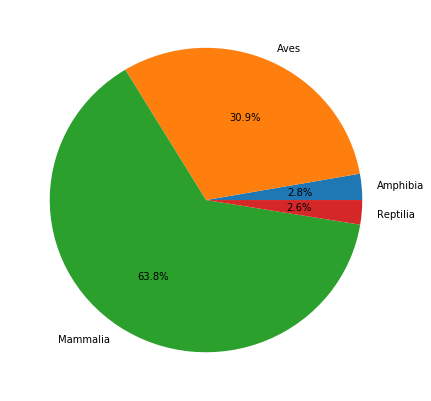

In [98]:
ds_size = selectRange(ds_complete, 28, 1, 300*1000)
#dsInfo(ds_size)
ds_long = selectNot(ds_size, 20, [None])
dsInfo(ds_long)
dsClassDistribution(ds_long)

## Longevity bar chart per class

Excluding those classes where the average longevity is more than 200 years.

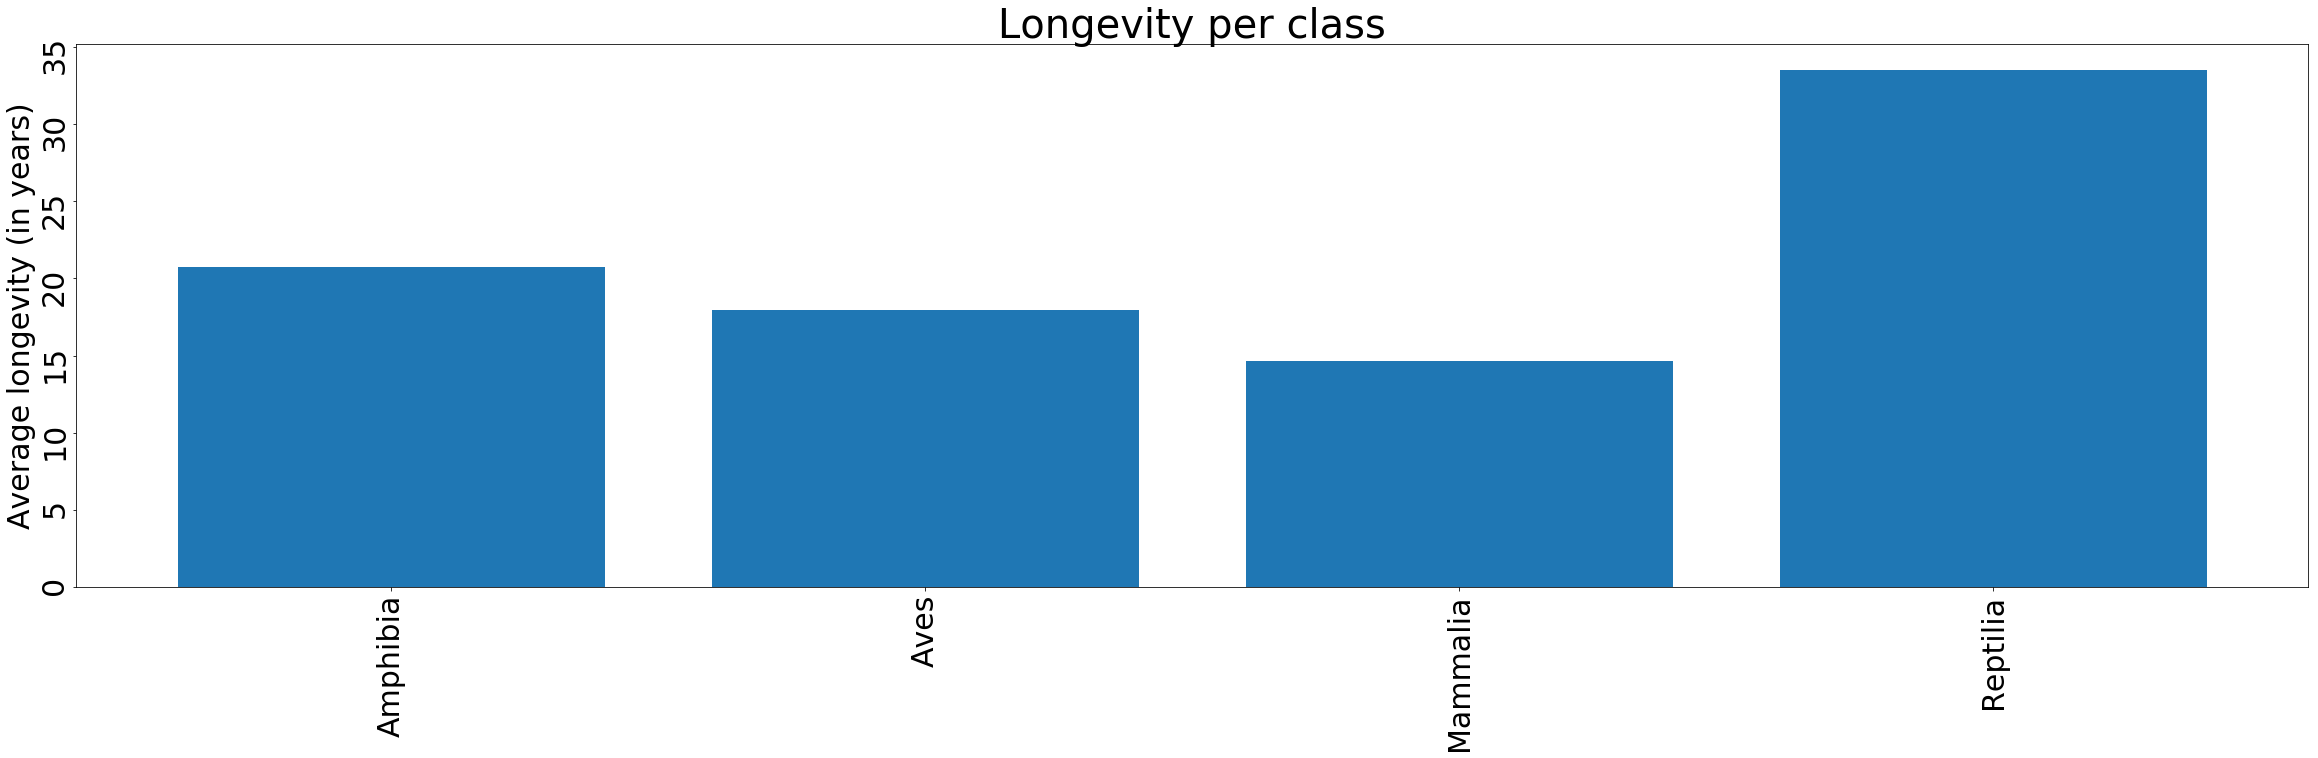

In [81]:
import matplotlib.pyplot as plt

class_long = dict()

for animal in ds_long:
    cl = animal[3]
    if cl in class_long:
        class_long[cl].append(animal[20])
    else:
        class_long[cl] = [animal[20]]
    
labels = []
long_avgs = []
for c in class_long:
    labels.append(c)
    longs = class_long[c]
    long_avgs.append(sum(longs) / len(longs))

plt.figure(figsize=(40,10))
plt.tick_params(labelsize=30, rotation= 90)
plt.bar(range(len(long_avgs)), long_avgs, tick_label=labels)
plt.title("Longevity per class", size=40)
plt.ylabel("Average longevity (in years)", size=30)
plt.show()

## Histogram of animal longevity

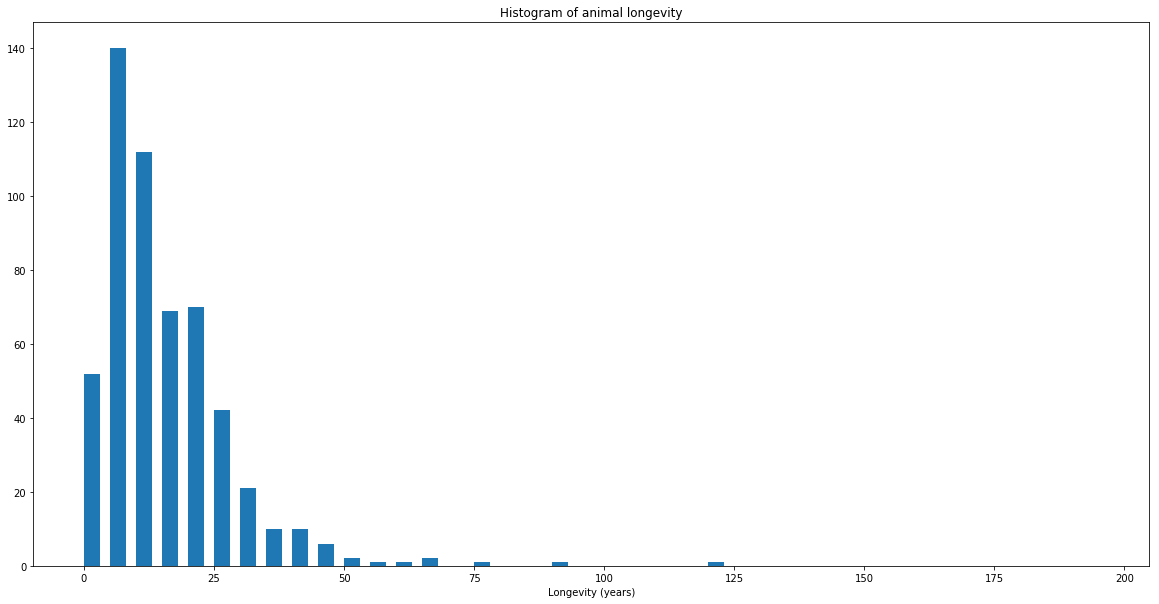

In [82]:
longs = []
for animal in ds_long:
    longs.append(animal[20])
 
plt.figure(figsize=(20,10))
plt.hist(longs, range(0,200,5), width=3)
plt.xlabel("Longevity (years)")
plt.title("Histogram of animal longevity")
plt.show()

## Box plot of animal longevity per class

Each box extends from the upper to the lower quartile values with a line for the median. The lines parallel to the y-axis shows what is the full extension of the data. Outliers are marked by points.

From that boxplot we can see that the class with the greatest variety of longevity are _Reptilia_.

Observe the data for _Mammalia_. There is only one outlier with a longevity of 120 years. Guess who this is!

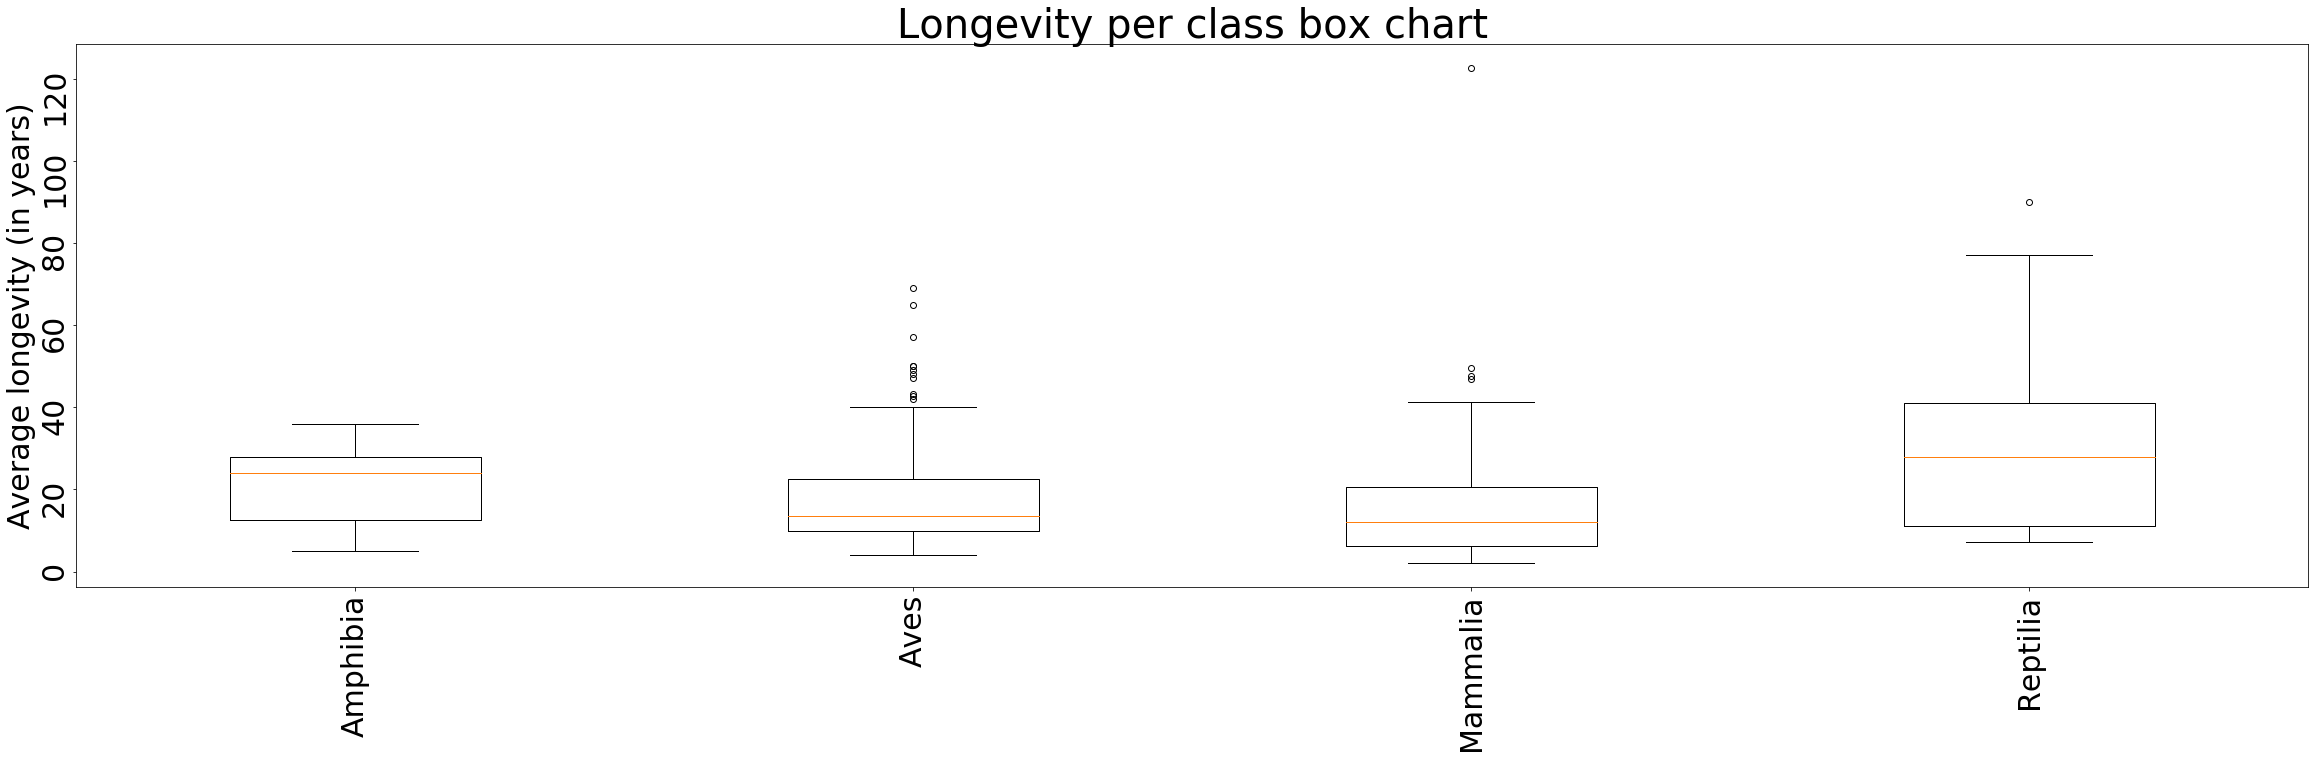

In [83]:
class_long = dict()

for animal in ds_long:
    cl = animal[3]
    if cl in class_long:
        class_long[cl].append(animal[20])
    else:
        class_long[cl] = [animal[20]]
    
labels = []
long_avgs = []
for c in class_long:
    labels.append(c)
    longs = class_long[c]
    long_avgs.append(longs)

plt.figure(figsize=(40,10))
plt.tick_params(labelsize=30, rotation= 90)
plt.boxplot(long_avgs, labels=labels)
plt.title("Longevity per class box chart", size=40)
plt.ylabel("Average longevity (in years)", size=30)
plt.show()

In [84]:
ds_mammals = select(ds_long, 3, ['Mammalia'])

for animal in ds_mammals:
    if animal[20] > 100:
        print("Long living mammal:", animal[8])

Long living mammal: Human


## Does the litter size relate to the number of litters per year?

Looks like it does not...

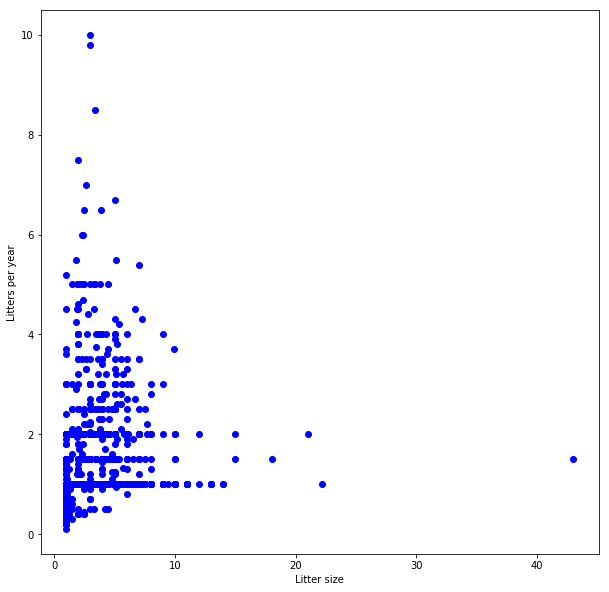

In [27]:
plt.figure(figsize=(10,10))
for animal in ds:
    litter_size = animal[13]
    litter_year = animal[14]
    if litter_size != None and litter_year != None:
        if litter_size > 100:
            #print("Outlier:", animal[8])
            continue
        else:
            plt.plot(litter_size, litter_year, 'bo')
    
plt.xlabel("Litter size")
plt.ylabel("Litters per year")
plt.show()

## Does the metabolic rate relate to the body mass?

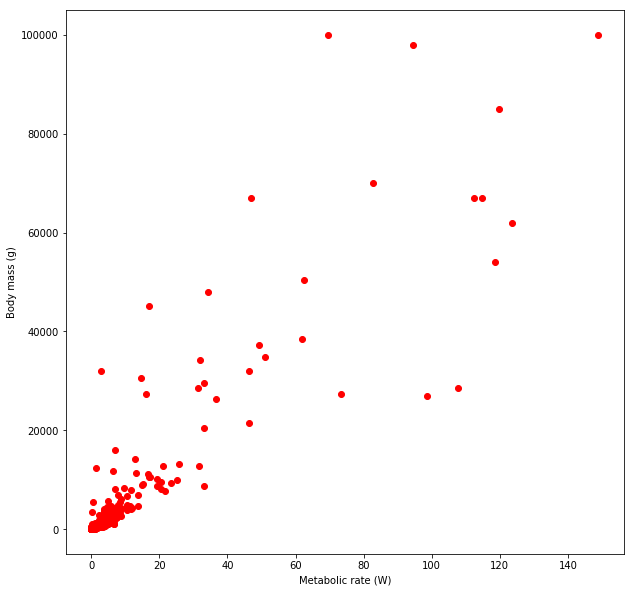

In [28]:
plt.figure(figsize=(10,10))
for animal in ds:
    met_rate = animal[27]
    body_mass = animal[28]
    if met_rate != None and body_mass != None:
        if body_mass > 100000:
            #print("Outlier:", animal[8])
            continue
        else:
            plt.plot(met_rate, body_mass, 'ro')
    
plt.xlabel("Metabolic rate (W)")
plt.ylabel("Body mass (g)")
plt.show()

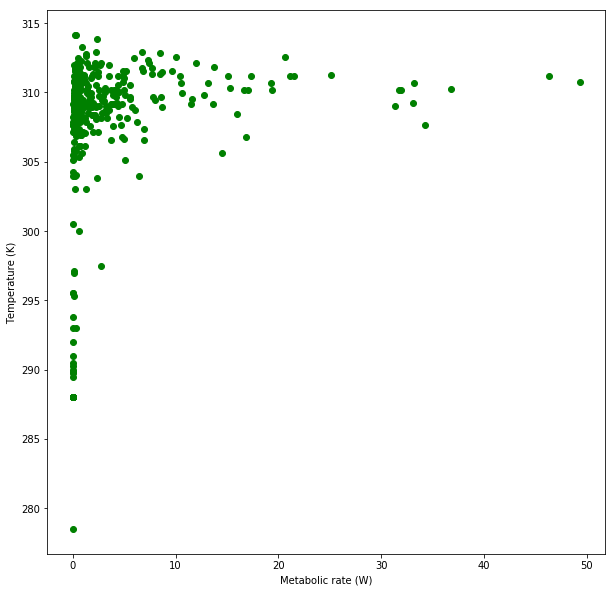

In [29]:
plt.figure(figsize=(10,10))
for animal in ds:
    met_rate = animal[27]
    temp = animal[29]
    if met_rate != None and temp != None:
        if met_rate > 50:
            #print("Outlier:", animal[8])
            continue
        else:
            plt.plot(met_rate, temp, 'go')
    
plt.xlabel("Metabolic rate (W)")
plt.ylabel("Temperature (K)")
plt.show()